### Feature Engineering & Data Pre-Processing (Ozellik Muhendisligi & Veri On Isleme)

If your data is bad, your machine learning tools are useless... (Eger veriniz kotu ise makine ogrenmesi araclariniz kullanissiz olacaktir...) - 2018

Veri biliminde verinin onemi yuksektir. Eger kotu veri varsa buradan iyi sonuc cikmasi beklenemez. Nasil bir calisma gerceklestiriyor olursan ol verin iyi olmali.

Ozellik Muhendisligi kapsaminda ham veriden cikarilabilecek bircok olasi ozellik de olacagindan sadece iyi veri ile ilgilenmiyoruz, ayni zamanda potansiyel veri ile de ilgileniyoruz.

The world's most valuable resource is no longer oil, but data...(2017)

- Outliers (Aykiri Degerler)
- Missing Values (Eksik Degerler)
- Encoding (One hot encoding, rare encoding...)
- Feature Scaling (Ozellik Olceklendirme)
- Feature Extraction (Ozellik Cikarimi)
- Feature Interactions (Ozellik Etkilesimleri)
- End-to_end Application (Uctan Uca Uygulama)

Applied machine learning is basically feature engineering - Andrew Ng

__Ozellik Muhendisligi__: Ozellikler uzerinde gerceklestirilen calismalar. Ham veriden degisken uretmek.(Feature Extraction ile alakali aslinda 2. kisim)

__Veri On Isleme__: Calismalar oncesi verinin uygun hale getirilmesi surecidir.

![Screenshot from 2024-03-14 15-29-56.png](<attachment:Screenshot from 2024-03-14 15-29-56.png>)

Veri bilimi, makine ogrenmesi, derin ogrenme konularinda feature engineering onemli!!!

Oran 80/20 model ve deployment'a ayrilan kisim 20 veri on islemesi ise 80 gibi dusunebilirsin.


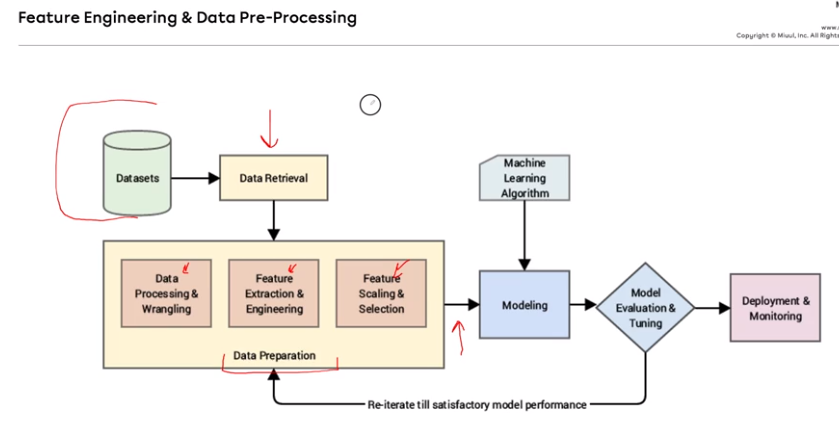

#### Outliers (Aykiri Degerler)
Verideki genel egilimin oldukca disina cikan degerlere aykiri deger denir.

Aykiri deger ne gibi problemler ortaya cikarir?
- Ozellikle dogrusal problemlerde aykiri degerlerin etkileri daha siddetlidir.
- Agac yontemlerinde siddetleri daha dusuktur.

Aykiri degerler bizim icin goz onunde bulundurulmasi gereken degelerdir. Sadece 3 tane aykiri deger ekleyerek x ve y arasindaki iliskinin yonu - siddeti degebilir.

Peki bu aykiri degerler neye gore belirlenir??
1. Sektor Bilgisi (Mesela ev fiyati tahmininde 1000 m2lik bir ev disarida birakilabilir)
2. Standard Sapma Yaklasimi (Bir degiskenin ortalamasi alinir diyelim ki 10 olsun, standart sapmasi alinir diyelim ki 5. Sonrasinda 5ten asagi ve 15ten yukari olanlar aykiri deger muamelesi gorur - Yani sapmanin altinda ve ustunde kalan degerleri istemiyorum demis oluyorsun.) / (Bir diger ornek ortalama 100 olsun, standart spma 10 olsun benim icin aykiri degerler iki standart sapma alti ve ustu olsun diye birsey de diyebilirim.80 ve 120 esik deger olmus olur boylelikle)
3. Z-Skoru Yaklasimi (Ilgili degisken standart normal dagilima uyarlanir --> Standartlastirilir. Boylece -3 +3 civarlarinda degerlerden olusur. Bu Z scoru neticesinde ortalama 0 olur. Dolayisi ile ortalamanin +-2.5 sagindan ve solundan degerler esik degeri olarak belirlenir. Mesela degiskenimiz 0 ile 100 arasi degerler alsin. Ortalamasi da 50 olsun. Bunu standard dagilima uyarladigimizda ortalamasi 0, standart sapmasi 1 olacak. 0'dan 2.5 birim saga, 2.5 sola gittigimiz noktalari esik deger olarak belirliyoruz. Bunlarin altinda ve ustunde kalanlari da aykiri deger olarak adlandiriyoruz. 'Genel egilimin disina cikmis' olarak nitelediriyoruz.)
4. Boxplot (interquartile range - IQR) Yontemi *** (En yaygin kullanilan. Diyelim ki elimizde yas degiskeni var ve aykiri degerleri saptamak istiyorum - Q2 --> Median) Q3 - Q1 = Robust Dagilim Olcusudur(IQR). Degelerin bir cogu Q1 ve Q3 arasinda dagiliyordur. Eger veri setinin icerisinde negatif deger yoksa, bir degiskende en kucuk deger 0 ise (degiskenin degerleri hep pozitif ise) bu durumda alt sinir calismiyor olacaktir ve genelde ust sinira gore calisilir.

![Screenshot from 2024-03-14 15-55-08.png](<attachment:Screenshot from 2024-03-14 15-55-08.png>)

Tek degiskenli olarak boxplot yontemi, cok degiskenli olarak LOF yontemini birlikte degerlendirecegiz.

Aykiri deger belirlemedeki kritik nokta esik deger belirlemek. Benim icin kabul edilebilir son nokta neresi???
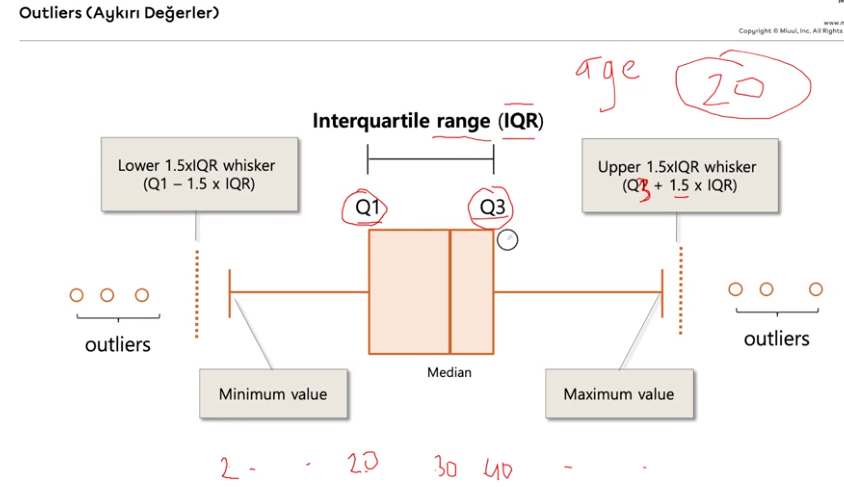

#### Aykiri Degerleri Yakalama

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor  #Cok degiskenli outlier yakalama yontemi
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

Kucuk olcekli uygulamalar icin titanic veri seti, buyuk olcekli uygulamalar icin application_train veri seti kullanilacak.

Her seferinde tekrar tekrar veri okunmasi islemi yapilmasin diye fonksiyon olarak tanimlandilar.

Feature Engineering ve Pre-Processing islemlerini large scale ihtiyaclara gore ele aliyor olacagiz. Yani fonksiyonel duzeyde, kendi fonksiyonlarimizi yazarak gerceklestiriyor olacagiz. 

In [2]:
def load_application_train():
    data = pd.read_csv("/home/esra/Miuul_Python_Programming_for_Data_Science/Feature_Engineering/feature_engineering/datasets/application_train.csv")
    return data

df = load_application_train()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
def load():
    data = pd.read_csv("/home/esra/Miuul_Python_Programming_for_Data_Science/Feature_Engineering/feature_engineering/datasets/titanic.csv")
    return data

df1 = load()
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


Grafik teknikle aykiri degerleri gormek istersek bu durumda kutu grafik kullanilir. (Boxplot) Boxplot bir sayisal degiskenin dagilim bilgisini verir.

Elinde bir sayisal degisken varsa bu sayisal degiskeni gosterebileceginiz en yaygin kutu grafikten sonra hangi teknik kullanilir?? --> Histogram grafigi kullanilir.

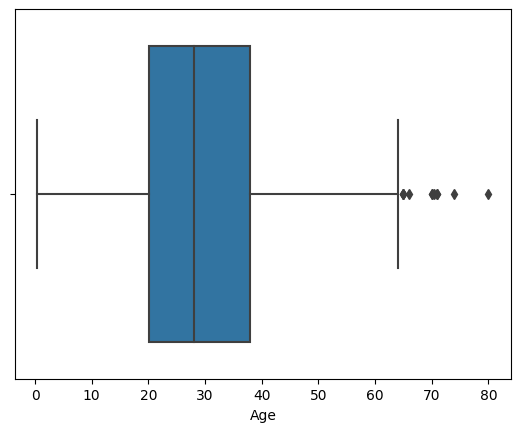

In [4]:
sns.boxplot(x=df1['Age'])
plt.show()

Peki programatik olarak bu aykiri degelere kendim erismek istesem nasil erisecegim??

Oncelikle yapilmasi gereken teori bolumunde anlatilan esik degerlere erismektir. (Veyrek degerlere eriselim ki sonra uzerinden IQR hesabi yapalim.)

In [5]:
q1 = df1['Age'].quantile(0.25)
q1

20.125

In [6]:
q3 = df1['Age'].quantile(0.75)
q3

38.0

In [7]:
iqr = q3 - q1
iqr

17.875

In [8]:
up = q3 + 1.5 * iqr
up

64.8125

In [9]:
low = q1 - 1.5 * iqr
low

-6.6875

Yas degiskeninde eksi degerler olamayacagindan alt siniri 0 kabul edecegim. low'u gormezden gelecegim.

Alt sinirdan kucuk ve ust sinirdan buyuk olanlari bir getirelim bakalim kimler bunlar??

In [10]:
df1[(df1['Age'] < low) | (df1['Age'] > up)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.000,0,0,13509,26.550,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.000,0,0,PC 17609,49.504,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000,0,0,27042,30.000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.000,0,0,C.A. 24580,10.500,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.000,1,1,WE/P 5735,71.000,B22,S


Cok degiller, bizim belirledifgimiz sinirlara gore aykiri degerler bunlar. --> __SORU__: Age'i Nan olanlara ne oldu??

Ben bu gozlem degerlerine bisey yapmak istiyorum diyelim. Bunlarin indexlerine nasil ulasirim?

In [11]:
df1[(df1['Age'] < low) | (df1['Age'] > up)].index

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

Ben hizli bir sekilde aykiri deger var mi yok mus sorusu sormak istiyorum, bu islemi nasil gerceklestiririm?

Oyle bir sey yapmaliyim ki df1[(df1['Age'] < low) | (df1['Age'] > up)] isleminin sonucunda bana az onceki gibi bircok satir gelmesin de var mi yok mu diye cevap gelsin!! Yani o sartlari saglayan satir var mi yok mu bilgisi

In [12]:
# Hic var mi icin: ANY()
df1[(df1['Age'] < low) | (df1['Age'] > up)].any(axis=None)

#Satir ya da sutuna degil de hepsine bakmak istedigimden axis=None yaptim

True

Peki tersten dogrulasak mi icimize sinmedi, o zaman durumun tersini yazip da bir any yazariz. Fakat bu durum icin yazamadik:)

O yuzden en azindan yas negatif olamayacagindan low'dan kucuk yas var mi yok mu kontrolu yapalim bakalim sadece.

In [13]:
df1[(df1['Age'] < low) ].any(axis=None)

False

In [14]:
df1[~((df1['Age'] < low) | (df1['Age'] > up))].any(axis=None)

True

1. Esik deger belirledik
2. Aykirilara eristik
3. Hizlica aykiri deger var mi yok mu diye sorduk

#### Fonksiyonlastirma
Yukarida yaptiklarimizi daha programatik bir sekilde ele alacagiz.

Cunku her seferinde yasa yaptigim gibi degisken ozelinde tek tek yazamam.

Yapilan bu temel islemleri birbirini tekrar etmeden yapabilmek icin fonksiyon yazacagim.

(Herseyi script seviyesinde yapacagiz ve sonunda istedigimiz degerlere isletim sistemi uzerinden scripti calistirdigimizda erisiyor olacagiz)

In [15]:
# Kendisine girilen degiskenin esik degerlerini hesaplar
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

Quantilleri on tanimli verdik ama bunlar degisir mi ki?? Evet tabi ki, 5e 95 ya da 1e 99 verilebilir. Ilerde veri on islemede gorecegiz daha detayli.

Ama temel literaturde 25e 75 oldugunda fonksiyonda on tanimli olarak boyle verildi.

In [16]:
outlier_thresholds(df1, 'Age')

(-6.6875, 64.8125)

In [17]:
outlier_thresholds(df1, 'Fare')

(-26.724, 65.6344)

Bu kosullara gore su aykiri degerlere eris demistik ya simdi bunlara gore secim yapabilirim.

In [18]:
# Kendisine girilen degiskende outlier var mi yok mu bilgisini donsun
def check_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

__DIKKAT!!__: Onemli Not: Eger outlier_thresholds'da q1 ve q3u bicimlendirmek istersen check_outliers'da da q1 ve q3 parametrelerini kullanmak gerekir!!!

Zorunda olduklarimi check_outliers'a verdim, digerleri secimsel isterse secer isterse secmez. Eger bunlari da check_outliers'dan bicimlendirmek istersem icerisine parametre olarak girmek zorundayim!!!

Bu ornegi fazla karistirmamak icin girmedik.

In [19]:
check_outliers(df1, 'Age')

True

Kod akisinda kullanabilmek uzere returnunde bool olan bir fonksiyon yazdik. Bu ciktiya dayanarak ilerde baska aksiyonlar alabilecegiz.

#### Feature Scaling (Ozellik Olceklendirme)


In [20]:
check_outliers(df1, 'Fare')

True

E age'e baktim, fare'e baktim. 100 tane degisken olursa yine boyle tek tek elle yazip mi bakacagim? Fonksiyonum olsa da her bir degisken icin tek tek is yapmis oluyorum.

Tabi ki de tek tek yazmayacagiz.

Burada bir fonksiyona ihtiyacimiz olacak, oyle bir fonksiyon olsun ki veri setindeki tum sayisal degiskenler icin bu islemi yapsin.

In [21]:
# Is hayatinda dehset cok kullanilacak bir fonksiyon
def grab_col_names(dataframe, cat_th=10, car_th=20):
    '''
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal degiskenlerin isimlerini verir.
    Not: Kategorik degiskenlerin icerisinde numeri gorunumlu kategorik degiskenler de dahildir.
    
    Parameters
    ----------
        dataframe: dataframe
            Degisken isimleri alinmak istenen dataframe
        cat_th: int, optional
            numerik fakat kategorik olan degiskenler icin sinif esik degeri
        car_th: int, optional
            kategorik fakat kardinal degiskenler icin sinif esik degeri
            
    Returns
    -------
        cat_cols: list
            Kategorik degisken listesi
        num_cols: list
            Numerik degisken listesi
        '''
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != 'O']
    
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == 'O']
    
    cat_cols = cat_cols + num_but_cat
    
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

Buyuk olcekli bir ihtiyacin oldugunda: Meta bilgilerle nasil ilerlerim?? Meta bilgi ile ilerlemek nedir?? Fonksiyonel data preprocessing nedir?? Script level preprocessing nedir?? Bunlari hicbir yerde goremez bulamazsin. Hocanin kiyagi!!

Benim goz ile yapamayacagim ust seviyeden bazi imkanlar saglayacak bu fonksiyon.

- Kategorik degisken: Cinsiyet kategorik degiskendir.
- Sayisal degisken
- Sayisal gorunumlu kategorik degisken: Mesela titanic verisindeki pclass 3 sinifa sahiptir. Sayisal gibi gorunur ama aslinda kategoriktir. Survived mesela.(bunlari kategorik'e dahil edecegim)
- Kategorik gorunumlu olup bilgi tasimayan, seyrekligi cok fazla olan yani cok fazla sinifa sahip olan degiskenler. (Kardinalligi yuksek degiskenler) Name degiskeni mesela, bizim bu veriyi degerlendirirken bilgi tasimaz. Kategorik degisken olamaz cunku gozlem sayisi kadar kategorik degisken sinifi olur eger olursa. Yani cok yuksek sayida sinifi varsa boyle adlandiracagiz.(islevsiz degisken)

In [22]:
cat_cols1, num_cols1, cat_but_car1 = grab_col_names(df1)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [23]:
cat_cols1

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [24]:
num_cols1

['PassengerId', 'Age', 'Fare']

Burada passengerid hosumuza gitmedi. Eger date degiskeni de olsaydi muhtemelen o da sayisal degisken olacakti. 

Bunlari disarda birakmak istesek nasil birakiriz??

In [25]:
# Sayisal degisknelerde bir exception yapip passengerid'yi dustuk
num_cols1 = [col for col in num_cols1 if col not in "PassengerId" ]
num_cols1

['Age', 'Fare']

In [26]:
cat_but_car1    # Islevsiz degiskenler

['Name', 'Ticket', 'Cabin']

In [27]:
# Bakalim bir numerik kolonlarda outlier var miymis??
for col in num_cols1:
    print(col, check_outliers(df1,col))

Age True
Fare True


In [28]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [29]:
# Bakalim buyuk veri setinde numerik kolonlarda outlier var miymis??
for col in num_cols:
    print(col, check_outliers(df,col))

SK_ID_CURR False
CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False


DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
BASEMENTAREA_MEDI True
YEARS_BEGINEXPLUATATION_MEDI True
YEARS_BUILD_MEDI True
COMMONAREA_MEDI True
ELEVATORS_MEDI True
ENTRANCES_MEDI True
FLOORSMAX_MEDI True
F

Sonrasinda SK_ID_CURR degiskenini exception olarak alip numeriklerden dusebilirsin.

Bir de quantillari 5e 95 yapsaydik mesela daha az outlier olan degisken donebilirdi.

Aykiri degerler var mi yok mu dedik ama bunlarin kendilerine nasil ulasacagiz?? --> Diger bolumde aykiri degerlere programatik olarak erismeyi degerlendiriyor olacagiz.

#### Aykiri Degerlere Erismek
Daha evvel aykiri degerlerin indexlerinemanual bir sekilde erismistik.

Simdi bu islemi fonksiyonlastiracagiz.

In [30]:
# Istersek index bilgisini versin/vermesin
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())

    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index


In [31]:
grab_outliers(df1, "Age")

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


In [32]:
grab_outliers(df1, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [33]:
age_index = grab_outliers(df1, "Age", True)
age_index

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

Aykiri degerlerle temas etmeye calistik, onlari gormeye/yakalamaya calistik.

Artik yakaladik ya kulaklarini cekecegiz; herhangi donusum islemlerine sokacagiz veya gormezden gelecegiz.

Bir cok agac yontemi aykiri degerlere duyarsizdir. Eksik degerlere duyarsizdir. Yayginca bu agaca dayali yontemler kullanilirken eksik ve aykiri degerler goz ardi edilir. Edilmelidir de bircok senaryoda.

Kabaca 3 sey yaptik:
- Outliers ve threshold hesapladik. (outliers_threshold(df, "Age))
- Outliers var mi yok mu sorusunu sorduk. (check_outliers(df, "Age))
- Aykiri degerleri yakaladik. (grab_outliers(df, "Age))

Bonus: Hayat kurtaran serisinden grab_col_names ile degiskenleri siniflandirdik.

Peki isimiz bitti mi?? Bitmedi!!!

Aykiri deger problemini cozmemiz lazim.

#### Aykri Deger Problemini Cozme
Ilk olarak --> Aykiriliklari veri setinden kaldirabiliriz. (Silme)
Ikinci yontem --> Baskilama Yontemi (re-assignment with thresholds)

In [34]:
# Silme
low_fare, up_fare = outlier_thresholds(df1, 'Fare')

In [35]:
low_fare

-26.724

In [36]:
up_fare

65.6344

In [37]:
# Silmeden once veri setimizde kac gozlem var bunu degerlendirelim:
df1.shape

(891, 12)

In [38]:
# alt limitte olanlarin altinda ve ust limitte olanlarin yukarisinda olanlarin tersini alirsak outlierslari devreden cikarmis oluruz.
df1[~((df1['Fare'] < low_fare) | (df1['Fare'] > up_fare))].shape   # yani aykiri olmayanlar

# Atama islemi yapmiyorum!! Sadece gozlemlemek adina bir bakiveriyorum.

(775, 12)

Tek bir degisken icin bunu yapmak kolay ama elimde birden fazla degisken var ve hepsindeki aykiriliklari silmek istiyorum. Bu durumda fonksiyon yazmak lazim:

In [39]:
def remove_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]

    return df_without_outliers
    

In [40]:
cat_cols1, num_cols1, cat_but_car1 = grab_col_names(df1)
num_cols1 = [col for col in num_cols1 if col not in "PassengerId"]

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [41]:
for col in num_cols1:
    new_df1 = remove_outliers(df1, col)

In [42]:
new_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q


In [43]:
# Silinen gozlem sayisi:
df1.shape[0] - new_df1.shape[0]

116

Dikkat: Bir tane aykiriliktan dolayi diger degiskenlerdeki dogru/iyi verileri de yok etmis oluyoruz. Bundan dolayi bazi senaryolarda bu verileri silmek yerine baskilamak yontemini sececegiz.

In [44]:
# Baskilama Yontemi (re-assignment with thresholds)
low, up = outlier_thresholds(df1, 'Fare')
print(low, up)

-26.724 65.6344


In [45]:
df1[((df1['Fare'] < low) | (df1['Fare'] > up))].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000,3,2,19950,263.000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.521,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000,1,0,PC 17604,82.171,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000,1,0,PC 17572,76.729,D33,C


Bu secim islemini loc ile de yapabilirdik.

In [46]:
# Belirli bir degerden kucuk veya belirli bir degerden buyuk olan 'Fare'leri getir dedim:
df1.loc[((df1['Fare'] < low) | (df1['Fare'] > up)), 'Fare']

1      71.283
27    263.000
31    146.521
34     82.171
52     76.729
61     80.000
62     83.475
72     73.500
88    263.000
102    77.287
118   247.521
120    73.500
124    77.287
139    79.200
151    66.600
159    69.550
180    69.550
195   146.521
201    69.550
215   113.275
218    76.292
224    90.000
230    83.475
245    90.000
256    79.200
257    86.500
258   512.329
262    79.650
268   153.463
269   135.633
275    77.958
290    78.850
291    91.079
297   151.550
299   247.521
305   151.550
306   110.883
307   108.900
310    83.158
311   262.375
318   164.867
319   134.500
324    69.550
325   135.633
332   153.463
334   133.650
336    66.600
337   134.500
341   263.000
366    75.250
369    69.300
373   135.633
375    82.171
377   211.500
380   227.525
385    73.500
390   120.000
393   113.275
412    90.000
435   120.000
438   263.000
445    81.858
453    89.104
484    91.079
486    90.000
496    78.267
498   151.550
504    86.500
505   108.900
520    93.500
527   221.779
537   

Baskilama Yontemi (re-assignment with thresholds): Kabul edilebilir bazi esik degerlerimiz vardi, bu esik degerlerin disinda kalan degerler esik degerle degistilir.

Silme yonteminde olusabilecek veri kaybindan hareketle veri kaybetmek istemedigimizde en azindan bu aykirilik bilgisi de tasinsin diye dusunerek aykiri degerler yakalandiktan sonra esik degerler ile degistirilir.

Simdi ust sinira gore bir secme ve atama islemi yapalim:

In [47]:
df1.loc[(df1['Fare'] > up), 'Fare']     # Eger bunu up'a esitlersem bu degerler yerine up basmis olacagim.

1      71.283
27    263.000
31    146.521
34     82.171
52     76.729
61     80.000
62     83.475
72     73.500
88    263.000
102    77.287
118   247.521
120    73.500
124    77.287
139    79.200
151    66.600
159    69.550
180    69.550
195   146.521
201    69.550
215   113.275
218    76.292
224    90.000
230    83.475
245    90.000
256    79.200
257    86.500
258   512.329
262    79.650
268   153.463
269   135.633
275    77.958
290    78.850
291    91.079
297   151.550
299   247.521
305   151.550
306   110.883
307   108.900
310    83.158
311   262.375
318   164.867
319   134.500
324    69.550
325   135.633
332   153.463
334   133.650
336    66.600
337   134.500
341   263.000
366    75.250
369    69.300
373   135.633
375    82.171
377   211.500
380   227.525
385    73.500
390   120.000
393   113.275
412    90.000
435   120.000
438   263.000
445    81.858
453    89.104
484    91.079
486    90.000
496    78.267
498   151.550
504    86.500
505   108.900
520    93.500
527   221.779
537   

In [48]:
df1.loc[(df1['Fare'] > up), 'Fare'] = up

In [49]:
# Su an asagidaki secim islemi bos gelmeli, cunku up'a esitleme islemi yaptik.
df1.loc[(df1['Fare'] > up), 'Fare'] 

Series([], Name: Fare, dtype: float64)

In [50]:
df1.loc[(df1['Fare'] < low), 'Fare'] = low

Simdi bunu fonksiyonlastiralim:

In [51]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [56]:
# df'i sifirdan okuduk
df1 = load()
df1.shape

(891, 12)

In [57]:
# grab_col_names'i cagirarak degiskenleri siniflandirdik
cat_cols, num_cols, cat_but_car = grab_col_names(df1)
num_cols = [col for col in num_cols if col not in "PassengerId"]

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [58]:
# Bu degiskenlerden numerik olanlarda outlier var mi yok mu baktik
for col in num_cols:
    print(col, check_outliers(df1,col))

Age True
Fare True


In [59]:
# Degisken degerlerini degistirip tekrar soracagim aykiri deger var mi diye
for col in num_cols:
    replace_with_thresholds(df1, col)

In [60]:
# Simdi bir daha check edelim outlier kaldi mi diye:
for col in num_cols:
    print(col, check_outliers(df1,col))

Age False
Fare False


Boylece artik aykiri degerleri programatik bir sekilde saptayabiliyoruz, ayrica bu problemi cozebiliyoruz.

Ozetle neler yaptik??:

In [61]:
df1 = load()

# Saptama islemleri:
# Aykiri degeri saptama islemi yaptik, bunun icin thresholdlari cikardik.
outlier_thresholds(df1, 'Age') #***

# Bu th'lara gore outlier var mi yok mu sorusuna yanit aradik
check_outliers(df1, 'Age')

# Outlierlari bize getir dedik
grab_outliers(df1, 'Age', index=True)


# Tedavi islemleri:
# Silerek tedavi
remove_outliers(df1, 'Age').shape  # gozlem sayisi azaldi, yeniden atama yapmadim

# Baskilama yontemi ile tedavi: TH'lerle degistir outlierslari
replace_with_thresholds(df1, 'Age')   #*** # Burada atama yapmaya gerek yok icerisinde kullandigimiz loc degiskeninden oturu kalici degisiklik yapiyor.

# Tekrar gozlemleyecek olursak aykiri deger kalmadigini gormus olacagiz.
check_outliers(df1, 'Age')

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


False

Buraya kadar tek degiskeni ele alarak problemi cozduk, simdi cok degiskenle calisagiz.

#### Cok Degiskenli Aykiri Deger Analizi (Local Outlier Factor)
Simdi iki tane degisken dusunelim; biri yas digeri yapilan evlilik sayisi.

Diyelim ki yas 17 --> Aykiri bir deger midir? Hayir

Evlilik sayisi da 3 olsun --> 10-15 olsa aykiri mi acaba derdik ama 3 normal gibi duruyor.

Fakat bu iki degiskeni bereber degerlendirecek olursak yani 17 yasinda 3 evlilik yapmis birini dusunecek olursak bu aykiri degerdir.

Tek basina aykiri olamayacak bazi degerler birlikte ele alindiginda bu durum aykirilik yaratiyor olabilir. Bundan dolayi aykiri degerlere cok degiskenli olarak bakmak faydali olacaktir.

Boylelikle cok degiskenli etkiyi gozlemledik. Peki local outlier factor(LOF) yontemi nedir? 

LOF yontemi cok degiskenli aykiri deger belirleme yontemidir. Gozlemleri bulunduklari konumda yogunluk tabanli scorelayarak buna gore aykiri deger tanimi yapabilmemizi saglar.

Bir noktanin local yogunlugu demek, ilgili noktanin etrafindaki komsuluklar demektir. Eger bir nokta komsularinin yogunlugundan anlamli bir sekilde farkli/dusuk ise bu durumda bu nokta daha seyrek bir bolgededir. Yani bu aykiri deger olabilir yorumu yapilabilir.

![Screenshot from 2024-03-18 15-37-14.png](<attachment:Screenshot from 2024-03-18 15-37-14.png>)

A burada aykiri degerdir. LOF yontemi bize bu komsuluklara gore uzaklik scoru hesaplama imkani saglar.


Outlier kavramini gorduk, bir de inlier yontemini gorelim. LOF yontemi der ki ben size bir score verecegim, bu benden aldiginiz score 1'e ne kadar yakinsa o kadar iyidir. Dolayisi ile 1'den uzaklastikca ilgili gozlemin outlier olma ihtimali artar.

![Screenshot from 2024-03-18 15-43-24.png](<attachment:Screenshot from 2024-03-18 15-43-24.png>)

Mesela bu case icin esik degerini 5 olarak belirlersem kimler aykiri deger olacaktir? 7 ve 5 li olan cemberler.

Elimizde iki degisken varken iki boyutlu gorsellestirebiliriz fakat ya elimizde 100 degisken varsa?? Bunu iki boyutta nasil gorsellestirebilirim? Eger bu 100 degiskeni 100 degiskenin bilgisini tasiyabilecek iki degiskene indirgeyebilirsem bu durumda iki boyutlu gorsellestirebilirim.


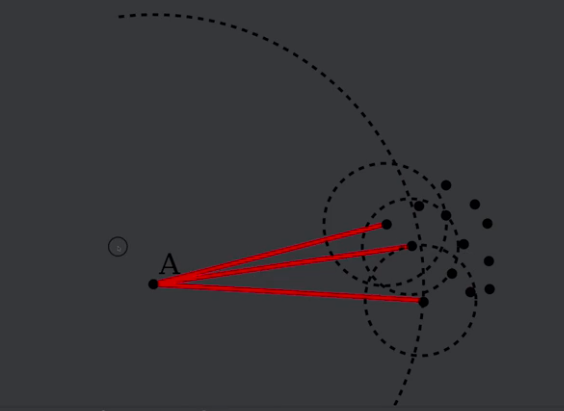
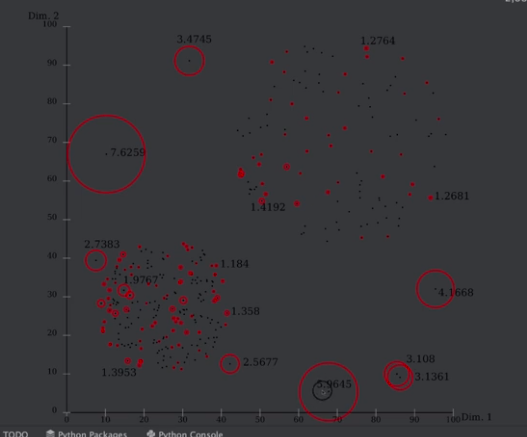